In [ ]:
# Upload kaggle.json (from your Kaggle account → API → Create New Token)
from google.colab import files
files.upload()   # Upload kaggle.json here

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pravalikareddi","key":"cc23ca85e0877e600aaa326978d10bad"}'}

In [ ]:
# Move kaggle.json to correct path
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download Dataset
!kaggle datasets download -d taweilo/taiwan-air-quality-data-20162024 -p ./ --unzip

Dataset URL: https://www.kaggle.com/datasets/taweilo/taiwan-air-quality-data-20162024
License(s): CC0-1.0
 61% 104M/172M [00:00<00:00, 1.09GB/s]
100% 172M/172M [00:00<00:00, 670MB/s] 


In [ ]:
#  Load Dataset
import pandas as pd
df = pd.read_csv("air_quality.csv", low_memory=False) # file name after unzip
print("Original Data:\n")
print(df.head())

Original Data:

               date   sitename          county   aqi pollutant    status  so2  \
0  2024-08-31 23:00      Hukou  Hsinchu County  62.0     PM2.5  Moderate  0.9   
1  2024-08-31 23:00  Zhongming   Taichung City  50.0       NaN      Good  1.6   
2  2024-08-31 23:00    Zhudong  Hsinchu County  45.0       NaN      Good  0.4   
3  2024-08-31 23:00    Hsinchu    Hsinchu City  42.0       NaN      Good  0.8   
4  2024-08-31 23:00     Toufen   Miaoli County  50.0       NaN      Good  1.0   

     co    o3 o3_8hr  ... windspeed winddirec unit co_8hr pm2.5_avg pm10_avg  \
0  0.17  35.0   40.2  ...       2.3       225  NaN    0.2      20.1     26.0   
1  0.32  27.9   35.1  ...       1.1       184  NaN    0.2      15.3     23.0   
2  0.17  25.1   40.6  ...       0.4       210  NaN    0.2      13.8     24.0   
3   0.2  30.0   35.9  ...       1.9       239  NaN    0.2      13.0     26.0   
4  0.16  33.5   35.9  ...       1.8       259  NaN    0.1      15.3     28.0   

  so2_avg   long

In [ ]:
# Common imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource
from bokeh.layouts import gridplot

# Display plots inline
output_notebook()

# Load dataset
df = pd.read_csv("air_quality.csv", low_memory=False)

# Basic cleaning
df = df.rename(columns={'date': 'Date'})
df['Date'] = pd.to_datetime(df['Date'], format='mixed')

# Convert pollutant columns to numeric, coercing errors
pollutant_cols = ['pm2.5', 'pm10', 'o3', 'co', 'no2', 'so2', 'no', 'nox']
for col in pollutant_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna(subset=['pm2.5', 'pm10', 'o3', 'co', 'no2'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month_name()

# If there's a city or station column
if 'sitename' in df.columns:
    city_col = 'sitename'
elif 'Station' in df.columns:
    city_col = 'Station'
else:
    city_col = None

In [ ]:
#      =============== MATPLOTLIB ============================

Line Plot - pm2.5 over time


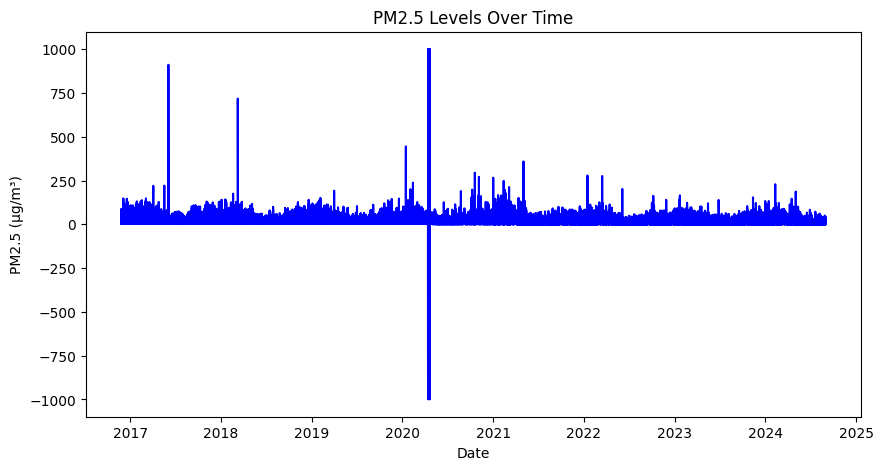




Bar Chart - Average pm2.5 by Year


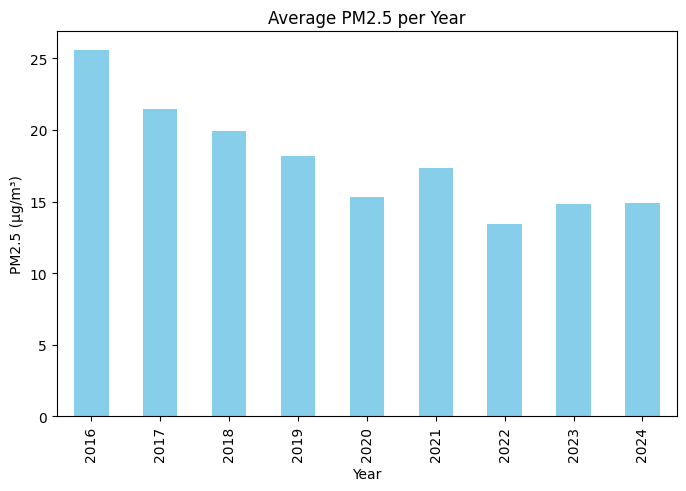




Histogram - Distribution of pm10


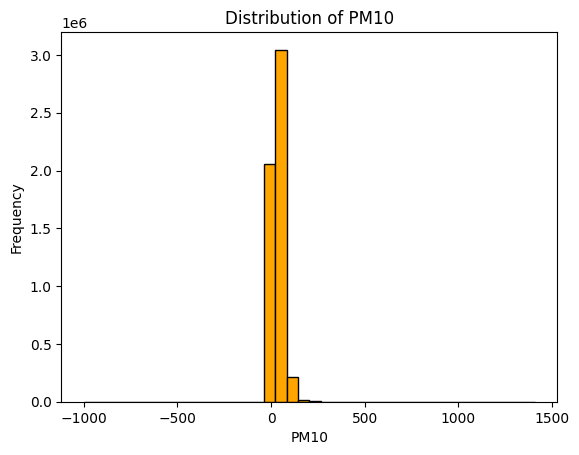




Scatter Plot - pm2.5 vs pm10


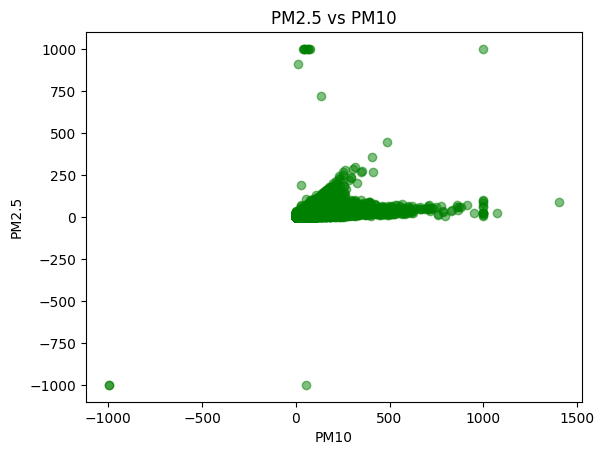




Box Plot - pm2.5 yearly distribution


/tmp/ipython-input-1307043975.py:42: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([df[df['Year']==y]['pm2.5'] for y in sorted(df['Year'].unique())], labels=sorted(df['Year'].unique()))


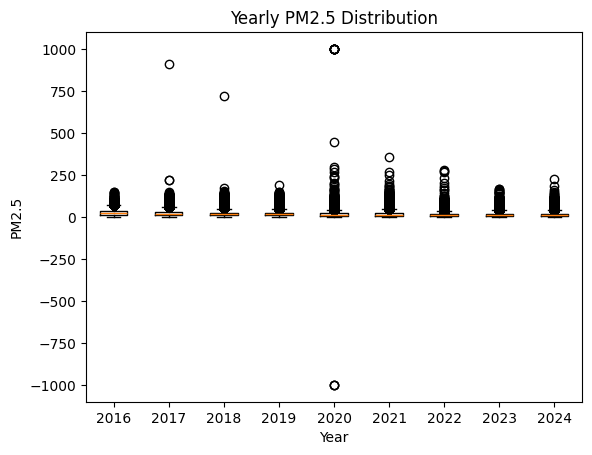




Pie Chart - Mean pollutant share


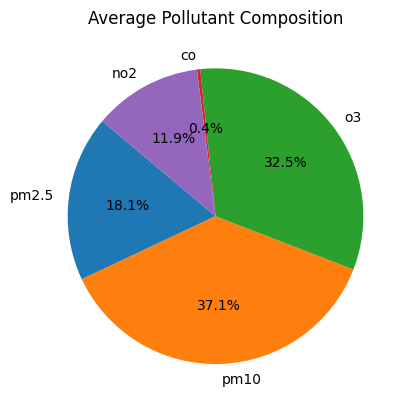




Area Plot - Trend of pollutants


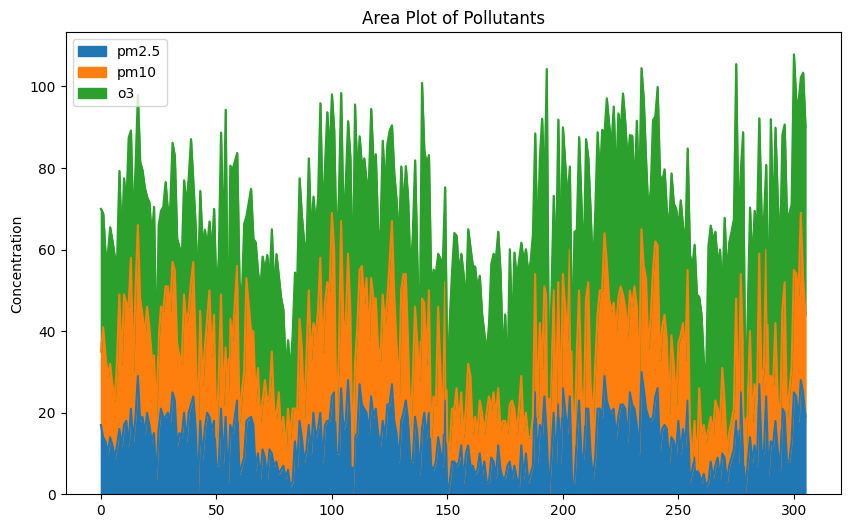




Subplots - Monthly average per pollutant


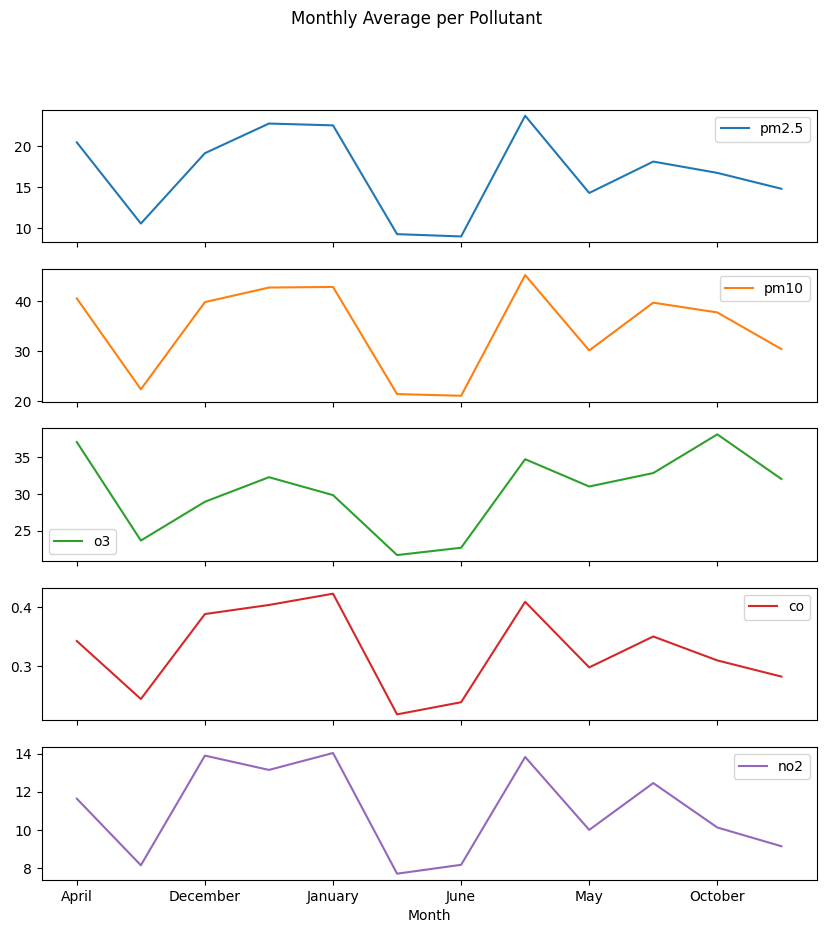




Horizontal bar - Top 10 pm2.5 cities


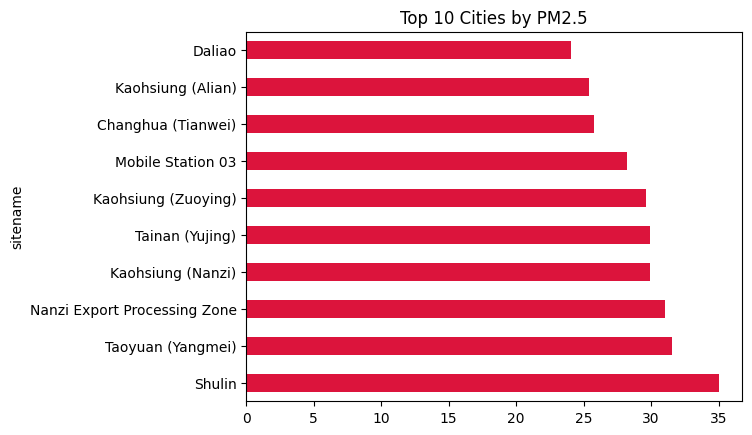




Stacked Bar - Average pollutants by year


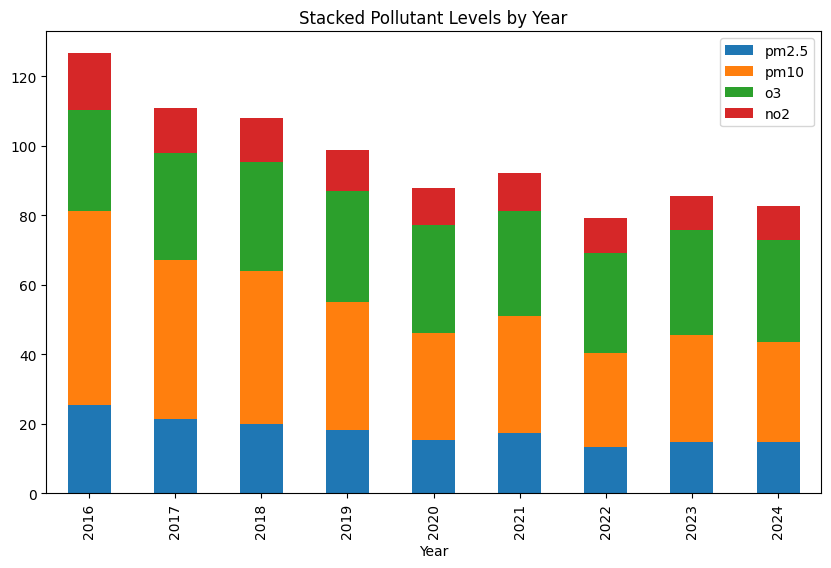

In [ ]:
import matplotlib.pyplot as plt

# 1. Line Plot - pm2.5 over time
print("1. Line Plot - pm2.5 over time")
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['pm2.5'], color='blue')
plt.title("PM2.5 Levels Over Time")
plt.xlabel("Date")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()
print("\n" * 2)

# 2. Bar Chart - Average pm2.5 by Year
print("2. Bar Chart - Average pm2.5 by Year")
yearly_avg = df.groupby('Year')['pm2.5'].mean()
yearly_avg.plot(kind='bar', color='skyblue', figsize=(8,5))
plt.title("Average PM2.5 per Year")
plt.ylabel("PM2.5 (µg/m³)")
plt.show()
print("\n" * 2)

# 3. Histogram - Distribution of pm10
print("3. Histogram - Distribution of pm10")
plt.hist(df['pm10'], bins=40, color='orange', edgecolor='black')
plt.title("Distribution of PM10")
plt.xlabel("PM10")
plt.ylabel("Frequency")
plt.show()
print("\n" * 2)

# 4. Scatter Plot - pm2.5 vs pm10
print("4. Scatter Plot - pm2.5 vs pm10")
plt.scatter(df['pm10'], df['pm2.5'], alpha=0.5, color='green')
plt.title("PM2.5 vs PM10")
plt.xlabel("PM10")
plt.ylabel("PM2.5")
plt.show()
print("\n" * 2)

# 5. Box Plot - pm2.5 yearly distribution
print("5. Box Plot - pm2.5 yearly distribution")
plt.boxplot([df[df['Year']==y]['pm2.5'] for y in sorted(df['Year'].unique())], labels=sorted(df['Year'].unique()))
plt.title("Yearly PM2.5 Distribution")
plt.xlabel("Year")
plt.ylabel("PM2.5")
plt.show()
print("\n" * 2)

# 6. Pie Chart - Mean pollutant share
print("6. Pie Chart - Mean pollutant share")
means = df[['pm2.5','pm10','o3','co','no2']].mean()
plt.pie(means, labels=means.index, autopct='%1.1f%%', startangle=140)
plt.title("Average Pollutant Composition")
plt.show()
print("\n" * 2)

# 7. Area Plot - Trend of pollutants
print("7. Area Plot - Trend of pollutants")
df[['pm2.5','pm10','o3']].iloc[:300].plot.area(figsize=(10,6))
plt.title("Area Plot of Pollutants")
plt.ylabel("Concentration")
plt.show()
print("\n" * 2)

# 8. Subplots - Monthly average per pollutant
print("8. Subplots - Monthly average per pollutant")
monthly = df.groupby('Month')[['pm2.5','pm10','o3','co','no2']].mean()
monthly.plot(subplots=True, figsize=(10,10), title="Monthly Average per Pollutant")
plt.show()
print("\n" * 2)

# 9. Horizontal bar - Top 10 pm2.5 cities
if city_col:
    print("9. Horizontal bar - Top 10 pm2.5 cities")
    city_avg = df.groupby(city_col)['pm2.5'].mean().nlargest(10)
    city_avg.plot(kind='barh', color='crimson')
    plt.title("Top 10 Cities by PM2.5")
    plt.show()
    print("\n" * 2)

# 10. Stacked Bar - Average pollutants by year
print("10. Stacked Bar - Average pollutants by year")
pollutants = df.groupby('Year')[['pm2.5','pm10','o3','no2']].mean()
pollutants.plot(kind='bar', stacked=True, figsize=(10,6))
plt.title("Stacked Pollutant Levels by Year")
plt.show()
print("\n" * 2)